#Nombres: 

#Quispe Sucullani Jose David
 
 	
#Luis Rolando Calcina Quispe 

#Gutierrez Murillo Gerzon

#Carrera: Ing Ciencias de la computacion 
         
#Gitlab: https://github.com/luis1308-5687/Laboratorio-5-IA

#Datasets: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset





#Parte 2

## K-Means para aprendizaje semi-supervisado.

realizamos la conexion ala base de datos

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


realizamos las importaciones necesarias para este parte

In [32]:
from sklearn.datasets import make_blobs  # Importa la función make_blobs para generar conjuntos de datos simulados con una distribución específica.
import numpy as np  # Importa la biblioteca NumPy para manejar matrices y vectores (cálculos numéricos eficientes).
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# used for manipulating directory paths
import os  # Importa la biblioteca os para manipular rutas y directorios del sistema de archivos.

# Plotting library
# Importa pyplot desde la biblioteca matplotlib, que se utiliza para generar gráficos y visualizaciones.
from matplotlib import pyplot as plt

# Optimization module in scipy
from scipy import optimize  # Importa el módulo optimize de scipy, que incluye funciones para la optimización matemática.

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat  # Importa la función loadmat de scipy.io, utilizada para cargar archivos en formato .mat de MATLAB.

import pandas as pd  # Importa pandas, una biblioteca para la manipulación y análisis de datos (manejo de tablas y dataframes).

# esta tabulate nos sirve para hacer tablas
from tabulate import tabulate  # Importa la función tabulate para mostrar datos en formato tabular (similar a tablas en texto o terminal).

# tells matplotlib to embed plots within the notebook
#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split  # Importa la función train_test_split para dividir el dataset en conjuntos de entrenamiento y prueba (separación de datos).
# Configura matplotlib para que las gráficas se muestren dentro del notebook (sólo se usa en entornos como Jupyter).
%matplotlib inline

cargamos el dataset

In [33]:
# Cargar el dataset usando pandas leemos el archivo de dataset
data = pd.read_csv('/content/drive/MyDrive/InteligeniaArtificial/smoke_detection_iot.csv')

mostramos el dataset

In [34]:
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


eliminanos la columna 0 que son los id unicos de los registros

In [35]:
data = data.drop(data.columns[0], axis=1)

mostramos como queda el dataset

In [36]:
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


realizamos la separacion de 20% test y 80% train

In [37]:
from sklearn.model_selection import train_test_split


# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_data.drop(['Fire Alarm'], axis=1).values
#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_data['Fire Alarm'].values
m_test = len(y_test)

# tomamos train_data, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_data.drop(['Fire Alarm'], axis=1).values
y_train = train_data['Fire Alarm'].values
m_train = len(y_train)

#para la aplicacion de la silueta
X_train_subset = X_train[:2000]


en un primer modelo se tiene que no se conoce las etiquetas de nuestro dataset, es decir no se conocen las Y, ni cuantos tipos de clases se tiene en este dataset.

Lo que prosigue es hacer el uso de Kmeans para calcular cual seria el numero optimo de clusters

en este primer ejemplo se hace un calculo dandole un total de 50 clusters

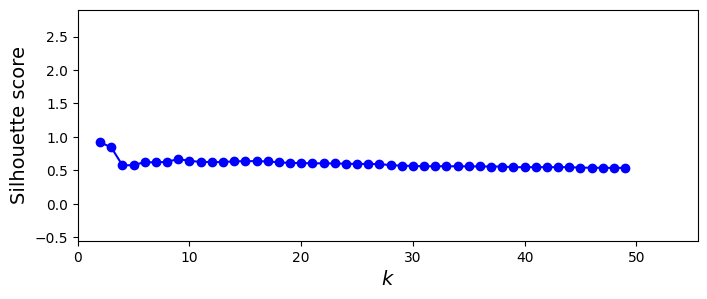

In [56]:
# Genera una lista de modelos KMeans con diferente número de clusters (k) desde 1 hasta 49.
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train_subset)
                for k in range(1, 50)]
# Calcula las puntuaciones de silhouette para cada modelo KMeans con k entre 2 y 49.
silhouette_scores = [silhouette_score(X_train_subset, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(8, 3))# Configuración de la gráfica.
plt.plot(range(2, 50), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([0, 55.5, -0.55, 2.9])
plt.show()

In [39]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

print(X_digits_dist.shape)

(50104, 2)


como cada fila, en cada columna es una distancia al centroide, entonces debemos escoger las menor columna de cada columna, dandonos como resultado teniendo los indices mas representativos:

In [40]:
idxs = np.argmin(X_digits_dist, axis=0)

print(idxs)
X_representative_digits = X_train[idxs]

print("Los valores mas representativos son", X_representative_digits)
print("La cantidad es: ",len(X_representative_digits))

[28047 48751]
Los valores mas representativos son [[1.65475143e+09 1.86560000e+01 5.08700000e+01 1.22800000e+03
  4.25000000e+02 1.29000000e+04 1.94310000e+04 9.38722000e+02
  1.66000000e+00 1.72000000e+00 1.14000000e+01 1.77700000e+00
  4.00000000e-02 1.80960000e+04]
 [1.65512848e+09 1.88740000e+01 4.18400000e+01 7.18500000e+03
  4.00000000e+02 1.30370000e+04 1.95080000e+04 9.36894000e+02
  3.90000000e-01 4.10000000e-01 2.69000000e+00 4.19000000e-01
  9.00000000e-03 4.17100000e+03]]
La cantidad es:  2


El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos
trampas ya que disponemos de dichas etiquetas).

In [41]:
y_representative_digits = y_train[idxs]
print(y_representative_digits)

[1 0]


Y entrenaremos un modelo clasificador:

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 97.5 ms


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.7740699345361648

#### Probando con datos aleatorias

Como puedes observar hemos obtenido una precisión de casi el $80%$ habiendo anotado simplemente 50 ejemplos, pero aquellas más representativas.

 Entrenar el mismo model

In [43]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

CPU times: user 34.1 ms, sys: 0 ns, total: 34.1 ms
Wall time: 18.4 ms


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.9609612007025388

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de ejemplos. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [44]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_== i] = y_representative_digits[i]

Creamos un nuevo modelo de regresion logistica:

In [45]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 210 ms, sys: 0 ns, total: 210 ms
Wall time: 114 ms


0.7847676832189047

## Aprendizaje Activo

El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en los que el modelo tenga más problemas.

In [46]:
#usamos el modelo entrenado, y obtenemos las probabilidades  probabilidades asignadas por un
# modelo de aprendizaje automático a cada una de las posibles clases de salida para una instancia de entrada dada.
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)]) #Zip une los dos arrays
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:2]]

array([0.50014272, 0.50075567])

In [47]:
X_lowest = X_train[:1000][sorted_ixs[:k]]

print(X_lowest)

[[ 1.65512578e+09 -7.31700000e+00  4.19000000e+01  6.80000000e+01
   4.00000000e+02  1.27980000e+04  2.06480000e+04  9.37431000e+02
   2.11000000e+00  2.19000000e+00  1.45400000e+01  2.26700000e+00
   5.10000000e-02  1.47500000e+03]
 [ 1.65512572e+09 -8.13900000e+00  4.15500000e+01  8.60000000e+01
   4.00000000e+02  1.27910000e+04  2.06430000e+04  9.37465000e+02
   2.08000000e+00  2.16000000e+00  1.43300000e+01  2.23400000e+00
   5.00000000e-02  1.41700000e+03]]


In [48]:
y_lowest = y_train[:1000][sorted_ixs[:k]]
y_lowest

array([0, 0])

In [49]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [50]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)
#pero la queria tanto Que 5 min con ella eran 10 horas con cualquier otra

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


CPU times: user 198 ms, sys: 683 µs, total: 199 ms
Wall time: 103 ms


0.7847676832189047

### Dataset Requirements

1. The dataset must be unlabeled (no predefined labels).
2. It should have more than 10 features (n > 10).
3. It should contain more than 10,000 examples (m > 10,000).
4. Prefer datasets with graphical, audio, textual, or real-world effect data.
5. Coordinate with Aly Delgado Danner Abel to ensure the dataset is not similar to previously used datasets.

### Steps to Apply

1. **Semi-Supervised Learning**: Use clustering techniques like K-Means to identify patterns and assign pseudo-labels.
2. **Active Learning**: Iteratively train the model by focusing on examples where the model has the most uncertainty.

In [51]:
# Example: Searching for datasets programmatically
from sklearn.datasets import fetch_openml

# Fetch a dataset with more than 10,000 examples and 10 features
dataset = fetch_openml(data_id=554, as_frame=True)  # Example dataset ID

# Check dataset properties
print(f"Dataset Name: {dataset.details['name']}")
print(f"Number of Features: {dataset.data.shape[1]}")
print(f"Number of Examples: {dataset.data.shape[0]}")

# Display the first few rows
dataset.data.head()

Dataset Name: mnist_784
Number of Features: 784
Number of Examples: 70000


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
